In [1]:
import numpy as np
import numpy.linalg as la
from time import time
from matplotlib import pyplot as plt
plt.style.use('dark_background')

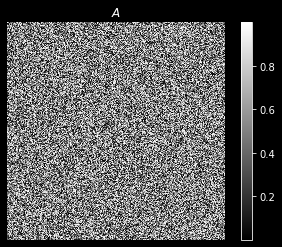

In [2]:
# Set dimension
n = 5000

# Generate random matrix
A = np.random.rand(n, n)
b = np.random.rand(n)

plt.imshow(A, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.axis('off')
plt.title(r'$A$')
plt.show()

Let's solve $Ax = b$

In [3]:
# Solve with inverse
start_time = time()
invA = la.inv(A)
x = invA.dot(b)
print("Time to solve with inverse = %.5f sec" % (time() - start_time))

Time to solve with inverse = 1.97273 sec


In [4]:
# Solve with standard method
start_time = time()
x = la.solve(A, b)
print("Time to solve default method = %.5f sec" % (time() - start_time))

Time to solve default method = 0.68122 sec
